In [55]:
import numpy as np
import pandas as pd
import pickle
#from build_database import flux_obj
from scipy import interpolate
import matplotlib.pyplot as plt
import os
import itertools
import random
import os
import time
import datetime as dt

%matplotlib nbagg
# Autoload changes made in external editor:
%load_ext autoreload
%autoreload 2

from mpl_toolkits.axes_grid1 import make_axes_locatable


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


62345.7383491
50318.2874932


<IPython.core.display.Javascript object>


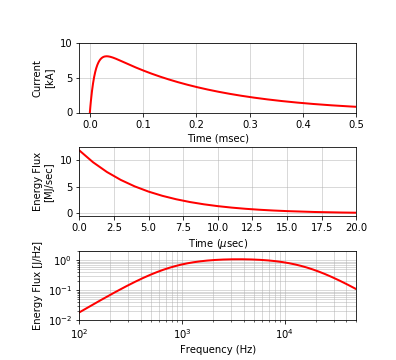

In [86]:
# --------------- Latex Plot Beautification --------------------------
fig_width = 4.5 
fig_height = 4
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 10,
          'font.size': 10,
          'legend.fontsize': 10,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------


I0 = 10000
mu = 4.*np.pi*1e-7
Zo = 377.0
H_E = 5000
P_A = 5e3
P_B = 1e5

dt = 1e-6
front_const = (1/Zo)*pow(mu*H_E*I0/2./np.pi,2)*(np.pi*np.pi/2)

t = np.arange(0,0.5e-3,dt)
S_t = front_const*pow((P_A*np.exp(-P_A * t) - P_B*np.exp(-P_B *t)),2)

I_t = I0*(np.exp(-P_A*t) - np.exp(-P_B*t))

# Spectrum
w = np.arange(100, 100000, 1)*2.*np.pi

Sw = front_const*pow(w,2)*pow(P_A - P_B,2)/(pow(w,2) + pow(P_A,2))/(pow(w,2) + pow(P_B,2))

print np.sum(S_t)*dt
print np.sum(Sw)*2.

fig, ax = plt.subplots(3,1, gridspec_kw={'hspace':0.5})
ax[0].plot(t*1e3, I_t*1e-3, 'r', linewidth=2)
ax[0].grid('on', alpha=0.6)
ax[0].set_xlabel('Time (msec)')
ax[0].set_ylabel('Current\n[kA]')
ax[0].set_xlim([-0.02,0.5])
ax[0].set_ylim([0,10])
ax[0].get_yaxis().set_label_coords(-0.09,0.5)
ax[1].plot(t*1e6, S_t*1e-9,'r', linewidth=2)
ax[1].grid('on', alpha=0.6)
ax[1].set_xlabel('Time ($\mu$sec)')
ax[1].set_ylabel('Energy Flux\n[MJ/sec]')
ax[1].set_xlim([0, 20])
ax[1].get_yaxis().set_label_coords(-0.09,0.5)


ax[2].loglog(w/2./np.pi,Sw,'r',linewidth=2)
ax[2].grid(True,which='both',alpha=0.6)
ax[2].set_xlim([100,50000])
ax[2].set_ylim([1e-2, 2e0])
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('Energy Flux [J/Hz]')
ax[2].get_yaxis().set_label_coords(-0.13,0.5)


# fig.tight_layout()
fig.subplots_adjust(left=0.2)
fig.savefig('Lightning_spectra.pdf')

In [15]:
# time-domain integration:
tot_t = (1/Zo)*pow(mu*H_E*I0/2./np.pi,2)*pow(P_A - P_B,2)/2./(P_A+P_B)
print tot_t

tpeak = np.log(P_A/P_B)/(P_A-P_B)
print tpeak*1e6

Imax = np.exp(-P_A*tpeak) - np.exp(-P_B*tpeak)
print Imax




11399.5200202
31.5340239321
0.811424921853


-0.090556995679594299

62345.7383491
50318.2874932


<IPython.core.display.Javascript object>


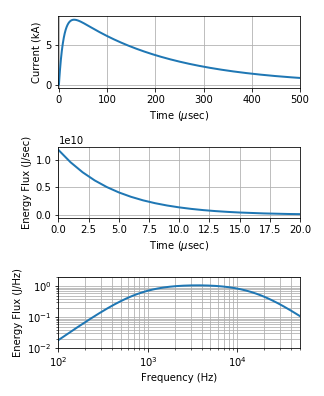

In [29]:
# --------------- Latex Plot Beautification --------------------------
fig_width = 3.5 
fig_height = 4.5
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 10,
          'font.size': 12,
          'legend.fontsize': 10,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------

# Same thing as above, but dressed up for powerpoint slides:
I0 = 10000
mu = 4.*np.pi*1e-7
Zo = 377.0
H_E = 5000
P_A = 5e3
P_B = 1e5

dt = 1e-6
front_const = (1/Zo)*pow(mu*H_E*I0/2./np.pi,2)*(np.pi*np.pi/2)

t = np.arange(0,0.5e-3,dt)
S_t = front_const*pow((P_A*np.exp(-P_A * t) - P_B*np.exp(-P_B *t)),2)

I_t = I0*(np.exp(-P_A*t) - np.exp(-P_B*t))

# Spectrum
w = np.arange(100, 100000, 1)*2.*np.pi

Sw = front_const*pow(w,2)*pow(P_A - P_B,2)/(pow(w,2) + pow(P_A,2))/(pow(w,2) + pow(P_B,2))

print np.sum(S_t)*dt
print np.sum(Sw)*2.

fig, ax = plt.subplots(3,1)
ax[0].plot(t*1e6, I_t*1e-3, linewidth=2)
ax[0].grid('on')
ax[0].set_xlabel('Time ($\mu$sec)')
ax[0].set_ylabel('Current (kA)')
ax[0].set_xlim([-1,500])
ax[1].plot(t*1e6, S_t, linewidth=2)
ax[1].grid('on')
ax[1].set_xlabel('Time ($\mu$sec)')
ax[1].set_ylabel('Energy Flux (J/sec)')
ax[1].set_xlim([0, 20])

ax[2].loglog(w/2./np.pi,Sw,linewidth=2)
ax[2].grid(True,which='both')
ax[2].set_xlim([100,50000])
ax[2].set_ylim([1e-2, 2e0])
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('Energy Flux (J/Hz)')
fig.tight_layout()
fig.savefig('Lightning_spectra_slideversion.pdf')

[   200.    230.    270.    320.    370.    440.    510.    600.    700.
    820.    960.   1120.   1310.   1530.   1790.   2090.   2450.   2860.
   3350.   3920.   4580.   5360.   6270.   7330.   8570.  10030.  11720.
  13710.  16040.  18750.  21930.  25650.  30000.]


<IPython.core.display.Javascript object>


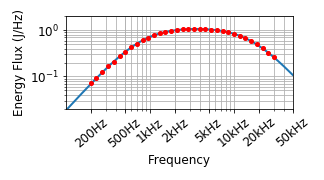

In [54]:
# --------------- Latex Plot Beautification --------------------------
fig_width = 3.5 
fig_height = 1.5
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 12,
          'font.size': 12,
          'legend.fontsize': 12,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------

import bisect
import matplotlib




f1 = 200; f2 = 30000;
num_freqs = 33
flogs = np.linspace(np.log10(f1), np.log10(f2), num_freqs)
freqs = np.round(pow(10, flogs)/10.)*10
print freqs


f_inds = np.digitize(freqs, w/2./np.pi)


fig, ax = plt.subplots(1,1)
ax.plot(w/2./np.pi,Sw,linewidth=2)

ax.plot(freqs, Sw[f_inds],'ro', markersize=4)
ax.grid(True,which='both')

ax.set_xlim([100,50000])
ax.set_ylim([2e-2, 1.2e0])
ax.set_ylim([2e-2, 2e0])
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xticks(np.array([200, 500, 1000, 2000, 5000, 10000, 20000, 50000]))

ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax.set_xticklabels(['200Hz','500Hz','1kHz','2kHz','5kHz','10kHz','20kHz','50kHz'], rotation=40)

ax.set_xlabel('Frequency')
ax.set_ylabel('Energy Flux (J/Hz)')
fig.tight_layout()
fig.savefig('input_frequency_spectrum_with_markers.png',dpi=150)